<a href="https://colab.research.google.com/github/mhtattersall/Dask/blob/main/Assignment22_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: NumPy vs. DASK

In the first part of the assignment, you will compare the performance of the NumPy and DASK *libraries* when computing operations on a two-dimensional NumPy *array*.

Run the code cell below to import the necessary *libraries* for this portion of the final assignment.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import graphviz

## Question 1

In the code cell below, fill in the ellipsis to create a two-dimensional NumPy *array*, `arr`, with entries from 1 to 1,000 and dimensions 2,000 by 2,000.

In [2]:
arr = np.random.randint(1, 1000, (2000, 2000))

Now that you have defined the `arr` *array*, you can use the DASK `from_array()` *function* to create a DASK *array*.

## Question 2

In the code cell below, set the value of the `chunks` *argument* to be equal to a *tuple* with elements equal to 250 and 250.

This will divide the NumPy *array* into smaller *chunks*, each with dimensions 250 by 250.

In [3]:
darr = da.from_array(arr, chunks=(250, 250))

DASK also allows you to visualize a summary of the DASK *array* by *printing* it to screen.

Run the code cell below.

In [4]:
darr

dask.array<array, shape=(2000, 2000), dtype=int64, chunksize=(250, 250), chunktype=numpy.ndarray>

## Question 3

What can you observe from the result *printed* above? What is the size of each *chunk*? How many *chunks* is the NumPy *array* being divided into?

This is an open-ended question that requires a written response.

In [8]:
arr.shape

(2000, 2000)

Question 3 answer: The 2,000 x 2,000 shape 2-dimensional NumPy array of random integers [1,1000] occupies 330.52 MB memory.  The NumPy array has been divided into 64 chunks of size 250x250 integers. The data type is int64, which is integers with 64-bit precision.

Another way to visualize the size of the *chunks* is by calling the DASK `chunksize()` *function*.

Run the code cell below.

In [5]:
darr.chunksize

(250, 250)

## Question 4

Similarly as you did in the previous code cell, call the `npartitions` *method* on the DASK *array* to *print* the number of partitions to screen.

In [9]:
darr.npartitions

64

To begin comparing the performances of the NumPy and DASK *libraries* when performing operations on an *array*, you can start by computing the sum of all the entries across the rows of the *array*.

## Question 5

In the code cell below, set the `axis` *argument* equal to 0 to sum over the rows.

In [10]:
res = darr.sum(axis=0)

## Question 6

In the code cell below, call the correct DASK *function* to visualize how each row is summed.

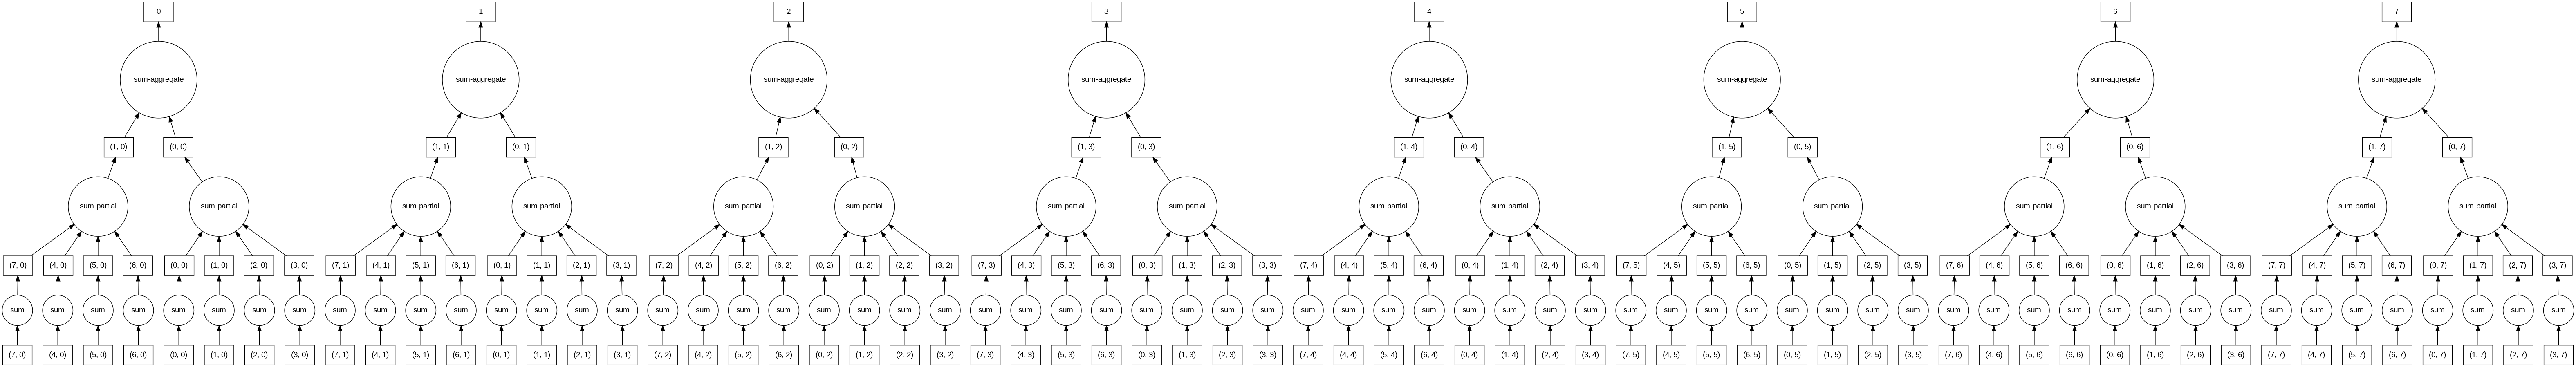

In [11]:
res.visualize()

## Question 7

Summarize your observations of the graph produced in the previous code cell.

This is an open-ended question that requires a written response.

Question 7 answer: The final result is a summation of all the elements along each row.  To perform this sum, the elements in the dask array are first summed in 64 partitions or chunks.  The chunks are then summed in groups of 4 to create 'sum-partial' amounts, which represents 4 chunks.  The 'sum-partials' are further added together with a neighbouring 'sum-partial' amount to create 'sum-aggregate' amounts, which represents 8 chunks.  

Next, suppose that you want to perform some more advanced computations, such as computing the mean of the NumPy and DASK *arrays*.

Run the code cell below to define the `numpy_mean()` and `dask_mean()` *functions* that compute the mean of the NumPy and DASK *arrays*, respectively.

In [12]:
def numpy_mean(size=(10, 10)):
  arr = np.random.random(size=size)
  return arr.mean()

def dask_mean(size=(10, 10)):
  if size[0] > 10000: chunks = (1000, 1000)
  else: chunks = (int(size[0]/10), int(size[1]/10))

  arr = da.random.random(size=size, chunks=chunks)
  y = arr.mean()
  return y.compute()

The `dask_arr_chk()` and `numpy_arr_chk` *functions* defined in the code cell below compute the mean of each *chunk* in the *arrays* and return the wall clock time used to complete the operations.

Run the code cell below.

In [13]:
import time

def numpy_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(4):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      numpy_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

def dask_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      dask_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

Now it's time for you to compare the performances of NumPy and DASK *libraries* when computing parallel operations.

## Question 8

In the code below, call the `numpy_arr_chk()` *function* and assign the result to the `num_time` variable.

In [14]:
%%time
num_time = numpy_arr_chk()

CPU times: user 1.48 s, sys: 345 ms, total: 1.83 s
Wall time: 1.87 s


## Question 9

In the code below, call the `dask_arr_chk()` *function* and assign the result to the `dask_time` variable.

In [15]:
%%time
dask_time = dask_arr_chk()

CPU times: user 21.7 s, sys: 213 ms, total: 21.9 s
Wall time: 13.8 s


## Question 10

Which *library* performs better, NumPy or DASK? Why?

This is an open-ended question that requires a written response.

Question 10 answer: On my machine, using Colab, when computing and returning the function:

- NumPy 'Wall time' was 1.87 seconds
- Dask 'Wall time' was 13.8 seconds

NumPy is optimised for operations on small to moderately sized arrays that fit in-memory, whereas Dask is designed to handle larger-than-memory computations by parallelising and distributing operations across multiple cores or machines.  

M instance of Colab has a CPU with 2 cores (see code below), so parallel computing is limited.  Futhermore, Dask is slower for small arrays because the overhead of task scheduling and managing Dask’s internal machinery.  Overall these drawbacks outweigh the benefits of parallel computation when handling small arrays.

In [19]:
import os

# Get the number of CPU cores
num_cores = os.cpu_count()

print(f"Number of CPU cores available: {num_cores}")


Number of CPU cores available: 2


# Part 2: Pandas vs. DASK

In the second part of the assignment, you will be comparing the performances of the pandas and DASK *libraries* when operating on a *dataframe* with just over 25,000,000 rows.

Run the code cell below to import the necessary *libraries* for this part of the assignment.

In [16]:
import dask.dataframe as ddf
import time
import pandas as pd

You will begin by reading a dataset that contains information about the salary of data scientists in India.

Because you want to compare the performance of the pandas and DASK *libraries*, you will start reading the data using the pandas *library*.

Run the code cell below.

Reference

Banerjee, Sourav. "Data Professionals Salary - 2022." Kaggle. 2022. https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india/version/9.

In [23]:
df_pandas = pd.read_csv('/content/sample_data/salary.csv')

In [31]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


Next, you will read the same data using the DASK *library*.

# Question 11

Complete the code in the cell below to read the same dataset using DASK. Use the DASK `read_csv()` *function*.

In [24]:
df_dask = ddf.read_csv('/content/sample_data/salary.csv')

You also need to define the `benchmark()` *function* that will help you to compare the performance between the two *libraries*.

Run the two code cells below.

In [25]:
def benchmark(function, function_name):
    start = time.time()
    function()
    end = time.time()
    print("{0} seconds for {1}".format((end - start), function_name))

In [26]:
def convert_pandas():
    return(df_pandas)
def convert_dask():
    return(df_dask)

Next, you can compare the performances for the two *dataframes*.

Run the code cell below.Next, you can compare the performances for the two *dataframes*.

Run the code cell below.

In [27]:
benchmark(convert_pandas, 'dataframe pandas')
benchmark(convert_dask, 'dataframe DASK')

1.430511474609375e-06 seconds for dataframe pandas
1.6689300537109375e-06 seconds for dataframe DASK


## Question 12

Which *dataframe* takes longer? Why?

This is an open-ended question that requires a written response.

Question 12 answer: The benchmark function times are similar, but the dask dataframe takes slightly more time than the pandas dataframe.  

Dask has additional 'overhead' for task graph creation, chunking, and scheduling, which can lead to longer process times for a single file.  

As is the case in this instance, for a dataset thats fit into memory, Pandas is typically faster due to its optimized single-threaded Input/Output operations and lack of overhead related to parallel computation.  The memory occupied by the 'df_pandas' pandas dataframe is 170 KB, as detailed when calling the info() method above.

Next, because the dataset is not large enough to make a meaningful comparison, you will concatenate the `df_pandas` and `df_dask` *dataframes* 5,000 times to increase the number of rows of data.

Run the cell below to create the new *dataframes*.

In [32]:
df_pandas_big = pd.concat([df_pandas for _ in range(5000)])

df_dask_big = pd.concat([df_pandas for _ in range(5000)])

In the code cell below, you will set up DASK to run in parallel.

## Question 13

Set the `npartition` *argument* inside of the `from_pandas` *function* equal to 2.

In [33]:
dfn = ddf.from_pandas(df_dask_big, npartitions=12)

In the code cell below, the necessary *functions* to compute the maximum value of the `Salary` column in the `dfn` and `df_pandas` *dataframes* are defined.

The `run_benchmarks()` *function*, which is used to compare the performances on both *dataframes*, is also defined.

In [34]:
def get_big_max_dask():
    return dfn.Salary.max().compute()
def get_big_max_pandas():
    return df_pandas.Salary.max()

def run_benchmarks():
    for i,f in enumerate([get_big_max_dask]):benchmark(f, f.__name__)

Run the code cell below to run the comparison between the `df_pandas_big` and `df_dask_big` *dataframes*.

In [36]:
run_benchmarks()
benchmark(get_big_max_dask, get_big_max_pandas.__name__)

6.236768007278442 seconds for get_big_max_dask
7.600311756134033 seconds for get_big_max_pandas


## Question 14

Which *library* takes less time to run, pandas, or DASK? Why?

This is an open-ended question and requires a written response.

Question 14 answer: The benchmark function times are similar, but the dask dataframe takes slightly less time than the pandas dataframe.

Dask takes less time because the dataframe, at circa 1GB, is large enough for the 'overhead' of dask, to be outweighed by the speed performance of its parallel processing.  
